<center><h1>SIE Assignment</h1></center>
<br>


# Part 0: Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In this project, I use supervised learning models to build a Intrusion Detection System (IDS) to identify normal interactions and various types of attacks. Furthermore, I will analyze top factors that give rise to malicious attacks to gain access or cause destruction to the network.

# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [2]:
df_train = pd.read_csv('SIE_Intern_Train.csv')
df_test = pd.read_csv('SIE_Intern_Evaluation.csv')

In [3]:
df_train.head(5)

,Unnamed: 0,duration,protocol_type,service,land,src_bytes,dst_bytes,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,random1,random2,Class
0,762821,1,tcp,smtp,SF,2181,327,0,0,0,...,114,0.33,0.03,0.01,0.02,0.0,0.0,0.0,0.0,normal.
1,3506532,0,tcp,private,S0,0,0,0,0,0,...,3,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
2,1570201,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
3,4503968,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.85,1.00,0.00,0.0,0.0,0.0,0.0,normal.
4,3903219,0,tcp,private,S0,0,0,0,0,0,...,22,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune.


In [4]:
print ("Num of rows: " + str(df_train.shape[0])) # row count
print ("Num of columns: " + str(df_train.shape[1])) # col count

Num of rows: 3428901
Num of columns: 43


In [5]:
df_test.head(5)

,Unnamed: 0,duration,protocol_type,service,land,src_bytes,dst_bytes,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,random1,random2,Class
0,3923214,0,tcp,private,S0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.
1,2514705,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
2,1087884,0,tcp,private,S0,0,0,0,0,0,...,4,0.02,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.
3,747274,0,udp,domain_u,SF,45,75,0,0,0,...,255,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
4,4147688,0,icmp,ecr_i,SF,520,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf.


In [6]:
print ("Num of rows: " + str(df_test.shape[0])) # row count
print ("Num of columns: " + str(df_test.shape[1])) # col count

Num of rows: 1469530
Num of columns: 43


In [7]:
# Check training data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428901 entries, 0 to 3428900
Data columns (total 43 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   duration                     int64  
 2   protocol_type                object 
 3   service                      object 
 4   land                         object 
 5   src_bytes                    int64  
 6   dst_bytes                    int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [8]:
# Check the unique values for each column
df_train.nunique()

Unnamed: 0                     3428901
duration                          8326
protocol_type                        3
service                             69
land                                11
src_bytes                         6346
dst_bytes                        19849
wrong_fragment                       2
urgent                               3
hot                                  5
num_failed_logins                   28
logged_in                            6
num_compromised                      2
root_shell                          72
su_attempted                         2
num_root                             3
num_file_creations                  65
num_shells                          39
num_access_files                     3
num_outbound_cmds                   10
is_hot_login                         1
is_guest_login                       2
count                                2
srv_count                          512
serror_rate                        512
srv_serror_rate          

## Part 1.2: Understand the features

In [9]:
# check missing values
df_train.isnull().sum()

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
land                           0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
# exploratory analysis

In [11]:
df_train.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,random1,random2
count,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,...,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06,3.428901e+06
mean,2.448419e+06,4.853453e+01,2.093837e+03,1.050432e+03,6.124411e-06,6.378137e-04,8.165882e-06,1.253055e-02,3.412172e-05,1.436562e-01,...,2.329389e+02,1.892013e+02,7.536610e-01,3.075546e-02,6.049518e-01,6.485661e-03,1.781317e-01,1.779307e-01,5.789917e-02,5.761644e-02
std,1.414211e+06,7.246716e+02,1.104937e+06,7.076500e+05,2.474748e-03,4.252111e-02,8.225577e-03,4.710108e-01,7.732061e-03,3.507409e-01,...,6.408556e+01,1.059174e+02,4.112141e-01,1.087036e-01,4.809889e-01,4.133307e-02,3.818727e-01,3.822160e-01,2.308918e-01,2.308939e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.223710e+06,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.447828e+06,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.673138e+06,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.898430e+06,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
df_train['Class'].value_counts()

smurf.              1964892
neptune.             750237
normal.              681840
satan.                11033
ipsweep.               8704
portsweep.             7342
nmap.                  1651
back.                  1503
warezclient.            715
teardrop.               673
pod.                    180
guess_passwd.            36
buffer_overflow.         21
warezmaster.             18
land.                    15
rootkit.                  8
imap.                     8
ftp_write.                6
multihop.                 6
loadmodule.               5
phf.                      3
perl.                     3
spy.                      2
Name: Class, dtype: int64

# Part 2: Feature Preprocessing

In [13]:
df_train["Class"] = np.where(df_train["Class"].str.contains("normal"), 1, 0)

In [14]:
df_train['Class'].value_counts()

0    2747061
1     681840
Name: Class, dtype: int64

In [15]:
# Get target variable
y = df_train['Class']
# check the propotion of y = 1
# python package: imbalance-learn
print(y.sum() / y.shape * 100)

[19.88508855]


In [16]:
df_test["Class"] = np.where(df_test["Class"].str.contains("normal"), 1, 0)

In [17]:
df_test['Class'].value_counts()

0    1178589
1     290941
Name: Class, dtype: int64

In [18]:
# Get target variable
y = df_test['Class']
# check the propotion of y = 1
# python package: imbalance-learn
print(y.sum() / y.shape * 100)

[19.79823481]


In [19]:
df_train = df_train.drop(df_train.columns[[0]], axis=1)

In [20]:
df_train.drop('is_hot_login', axis = 1, inplace = True) 

In [21]:
df_test = df_test.drop(df_test.columns[[0]], axis=1)
df_test.drop('is_hot_login', axis = 1, inplace = True) 

In [22]:
# separate target column from encoded data 
temp_train = df_train.drop(['Class'], axis=1)
temp_Ytrain = df_train[['Class']].copy()
temp_test = df_test.drop(['Class'], axis=1)
temp_Ytest = df_test[['Class']].copy()

In [23]:
# Scaling numerical attributes

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = temp_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(temp_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(temp_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_df_train = pd.DataFrame(sc_train, columns = cols)
sc_df_test = pd.DataFrame(sc_test, columns = cols)

In [25]:
sc_df_test

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,random1,random2
0,-0.066502,-0.003785,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,-1.720881,-1.760641,0.271729,-1.258430,-0.156099,2.153207,2.151912,-0.250992,-0.249855
1,-0.066502,-0.000609,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,0.620910,0.598766,-0.282964,0.820638,-0.156099,-0.466255,-0.465290,-0.250992,-0.249855
2,-0.066502,-0.003785,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,-1.749209,-1.784964,0.271729,-1.258430,-0.156099,2.153207,2.151912,-0.250992,-0.249855
3,-0.066502,-0.003646,-0.002396,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,0.620910,0.598766,-0.282964,-1.237639,-0.156099,-0.466255,-0.465290,-0.250992,-0.249855
4,-0.066502,-0.002184,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,0.620910,0.598766,-0.282964,0.820638,-0.156099,-0.466255,-0.465290,-0.250992,-0.249855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469525,-0.066502,-0.000609,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,0.620910,0.598766,-0.282964,0.820638,-0.156099,-0.466255,-0.465290,-0.250992,-0.249855
1469526,-0.066502,-0.000609,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,0.620910,0.598766,-0.282964,0.820638,-0.156099,-0.466255,-0.465290,-0.250992,-0.249855
1469527,-0.066502,-0.003785,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,-1.607569,-1.663345,0.179280,-1.258430,-0.156099,2.153207,2.151912,-0.250992,-0.249855
1469528,-0.066502,-0.000609,-0.002556,-0.002183,-0.015459,-0.001892,-0.026327,-0.004409,-0.408873,-0.003776,...,0.343208,0.620910,0.598766,-0.282964,0.820638,-0.156099,-0.466255,-0.465290,-0.250992,-0.249855


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#encoding categorical attributes

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
c_train = temp_train.select_dtypes(include=['object']).copy()
c_test = temp_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
categorical_train = c_train.apply(encoder.fit_transform)
categorical_test = c_test.apply(encoder.fit_transform)
categorical_test

,protocol_type,service,land
0,1,47,5
1,0,15,9
2,1,47,5
3,2,12,9
4,0,15,9
...,...,...,...
1469525,0,15,9
1469526,0,15,9
1469527,1,47,5
1469528,0,15,9


In [29]:
train_x = pd.concat([sc_df_train,categorical_train],axis=1)
train_y = temp_Ytrain
train_x.shape

(3428901, 40)

In [30]:
test_x = pd.concat([sc_df_test,categorical_test],axis=1)
test_y = temp_Ytest
test_x.shape

(1469530, 40)

In [31]:
train_x.iloc[:, :].corr()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,random1,random2,protocol_type,service,land
duration,1.000000,4.475738e-02,0.008274,-0.000166,-0.001005,3.649716e-03,0.003991,0.007127,-0.020762,0.023181,...,0.409512,0.043015,-0.008605,-0.030580,-0.030648,0.011406,0.016769,0.163097,0.082585,0.016939
src_bytes,0.044757,1.000000e+00,0.000022,-0.000005,-0.000026,-5.687364e-08,0.000742,-0.000007,0.000017,0.000003,...,0.000797,-0.000919,-0.000040,-0.000781,-0.000553,-0.000110,0.003461,0.000940,-0.000201,-0.001994
dst_bytes,0.008274,2.239809e-05,1.000000,-0.000004,-0.000022,9.397780e-05,0.000115,0.000685,0.001961,0.001330,...,0.002934,-0.000560,0.000334,-0.000672,-0.000670,0.001998,0.002008,0.001405,0.000968,-0.000440
wrong_fragment,-0.000166,-4.689633e-06,-0.000004,1.000000,-0.000037,-2.456803e-06,-0.000066,-0.000011,-0.001014,-0.000005,...,-0.000483,0.001805,0.034566,0.005039,0.003368,-0.000585,-0.000618,0.002327,-0.000876,-0.003109
urgent,-0.001005,-2.645822e-05,-0.000022,-0.000037,1.000000,-1.489108e-05,-0.000399,-0.000066,-0.006144,-0.000029,...,0.023623,-0.010198,0.003884,-0.005999,-0.006983,0.009330,-0.003743,0.036084,0.021138,0.007749
hot,0.003650,-5.687364e-08,0.000094,-0.000002,-0.000015,1.000000e+00,0.004340,-0.000004,0.002424,0.009246,...,0.001963,-0.001013,0.001371,-0.000359,-0.000462,-0.000249,-0.000248,0.000934,0.002212,0.000513
num_failed_logins,0.003991,7.424497e-04,0.000115,-0.000066,-0.000399,4.339511e-03,1.000000,0.003646,0.064731,0.002926,...,0.008600,-0.031776,-0.002507,-0.012031,-0.012209,-0.005070,-0.005458,0.025018,-0.009382,0.013227
logged_in,0.007127,-7.042624e-06,0.000685,-0.000011,-0.000066,-4.380992e-06,0.003646,1.000000,0.001526,0.003745,...,0.001638,-0.004904,0.004482,-0.001000,-0.001225,0.004982,0.004729,0.004150,0.007470,-0.002451
num_compromised,-0.020762,1.725190e-05,0.001961,-0.001014,-0.006144,2.423810e-03,0.064731,0.001526,1.000000,0.004640,...,-0.058796,-0.460580,0.139708,-0.188510,-0.189263,-0.090793,-0.088267,0.385176,0.078071,0.209930
root_shell,0.023181,3.072294e-06,0.001330,-0.000005,-0.000029,9.246175e-03,0.002926,0.003745,0.004640,1.000000,...,0.001944,-0.002134,0.001694,-0.000443,-0.000541,-0.000248,-0.000184,0.001787,0.004215,0.000633


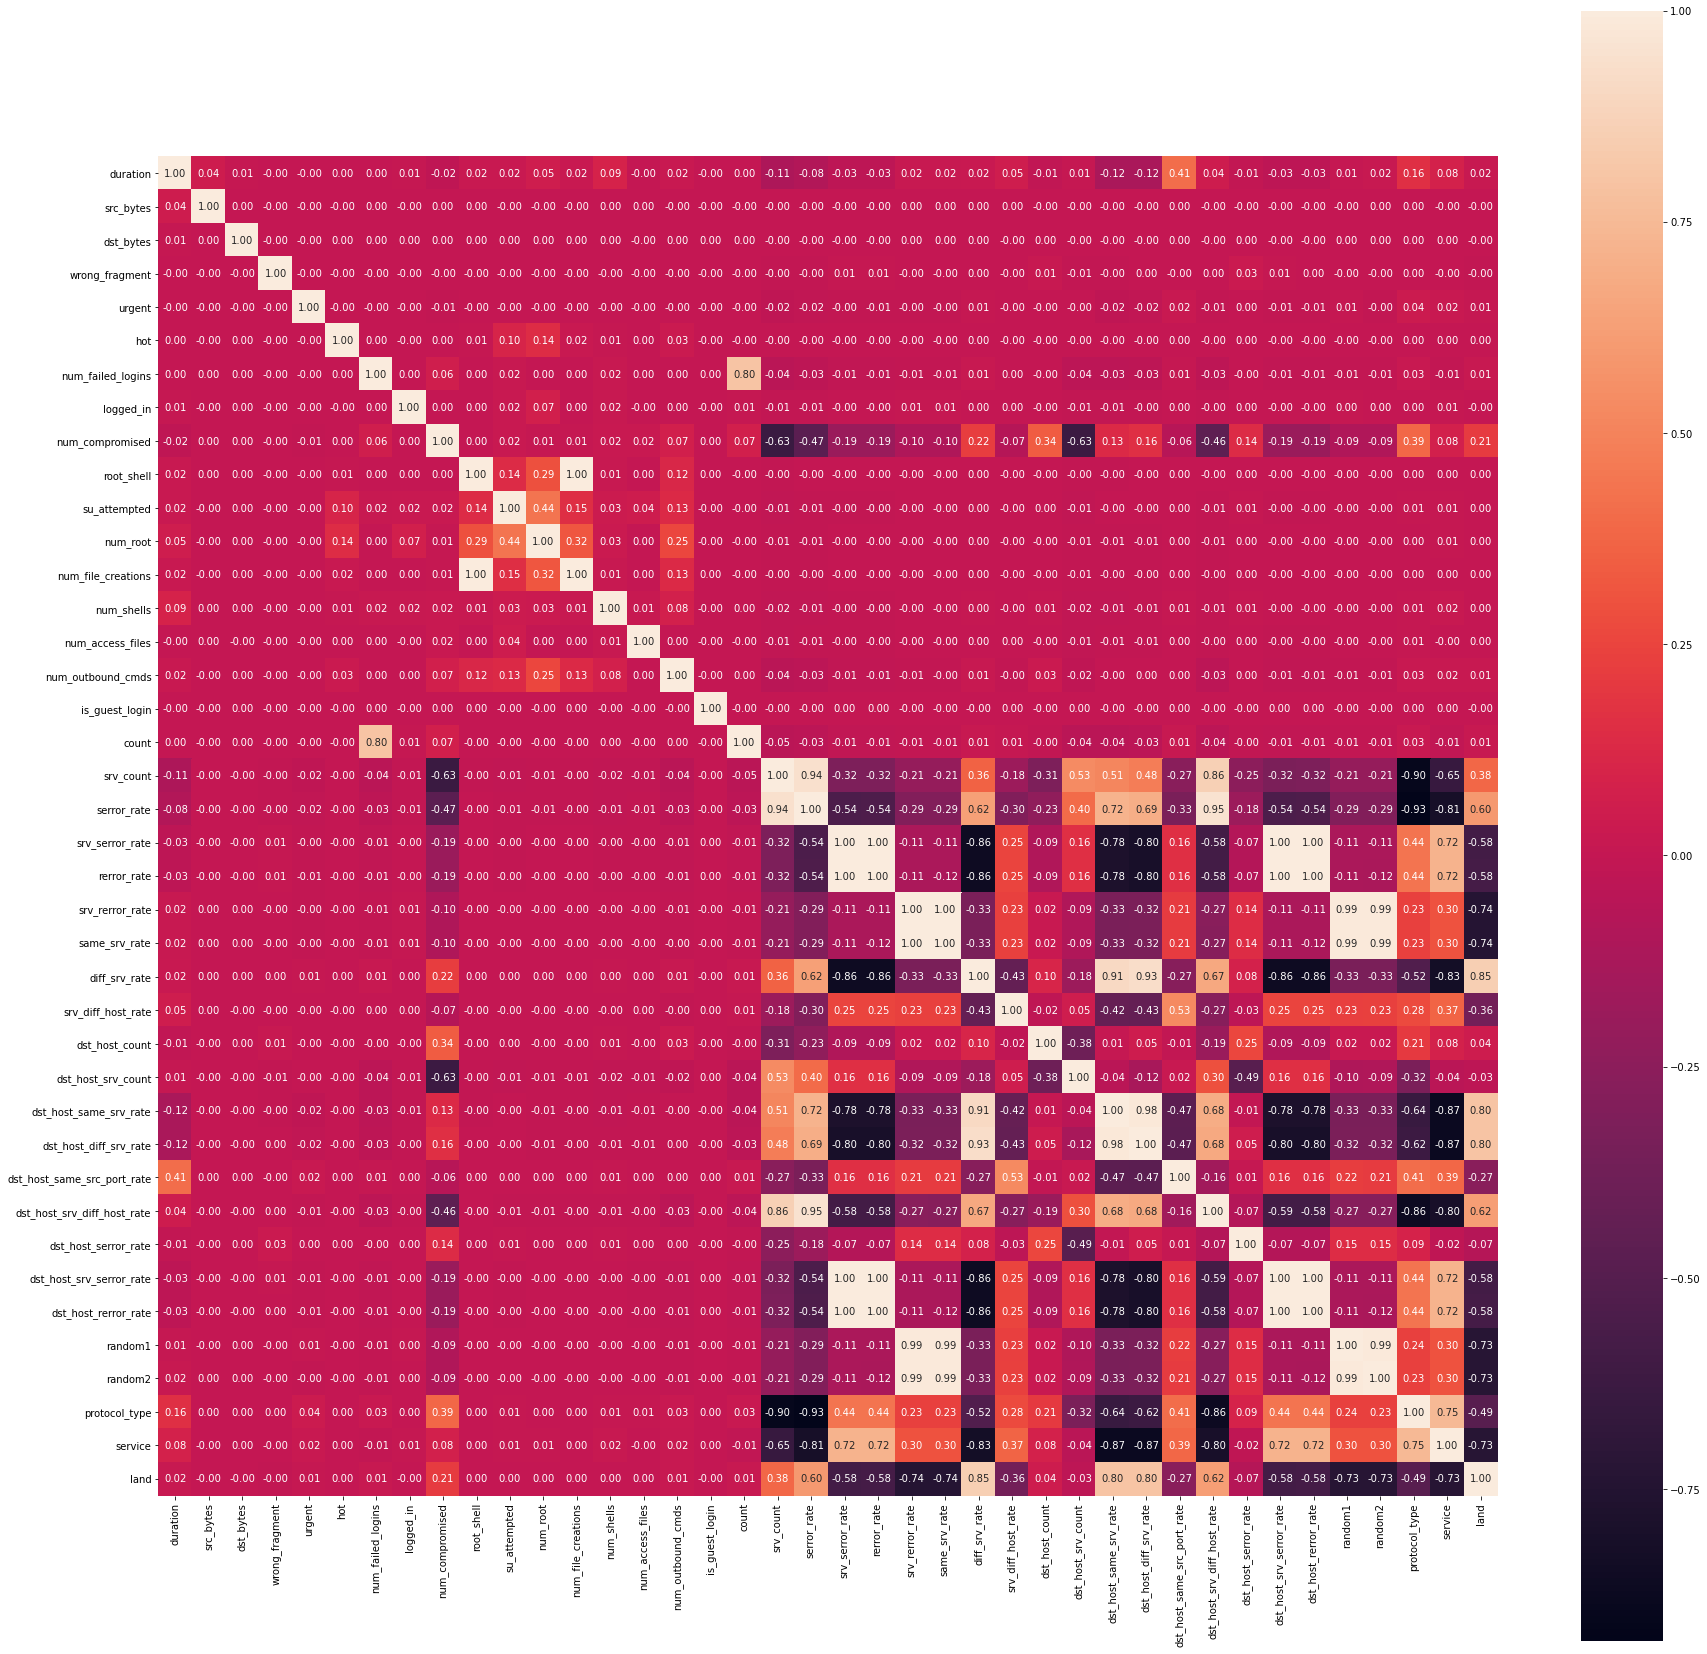

In [32]:
plt.subplots(figsize=(30, 30))
sns.heatmap(train_x.iloc[:, :].corr(), square=True, annot=True, fmt='.2f')

In [34]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.  
train_x.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
train_x.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis.  
train_x.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.  
train_x.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis.  
train_x.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
train_x.drop('dst_host_rerror_rate', axis = 1, inplace = True) 


# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.  
train_x.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 



In [36]:
# This variable is highly correlated with num_compromised and should be ignored for analysis.  
test_x.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
test_x.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis.  
test_x.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
test_x.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis.  
test_x.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.  
test_x.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
test_x.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 

# Part 3: Model Training and Result Evaluation

## Part 3.1: Split dataset

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(train_x,train_y,train_size=0.70, random_state=2)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 2400230 observation with 33 features
test data has 1028671 observation with 33 features


## Part 3.2: Model Training and Selection

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# # Train KNeighborsClassifier Model
# classifier_KNN = KNeighborsClassifier()
# classifier_KNN.fit(X_train, y_train); 

# # Train LogisticRegression Model
# classifier_logistic = LogisticRegression()
# classifier_logistic.fit(X_train, y_train);

# Train Random Forest Model
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
# Prediction of test data
classifier_RF.predict(X_test)

array([1, 1, 0, ..., 1, 0, 0])

In [47]:
# Accuracy of test data
classifier_RF.score(X_test, y_test)

0.9999543099786035

In [48]:
# Use 5-fold Cross Validation to get the accuracy for different models
# model_names = ['Logistic Regression','KNN','Random Forest']
from sklearn import model_selection
model_names = ['Random Forest']
# model_list = [classifier_logistic, classifier_KNN, classifier_RF]
model_list = [classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.99995625 0.99996459 0.99994584 0.99993751 0.99993959]
Model accuracy of Random Forest is 0.9999487549109876


## Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [49]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Part 3.3.1: Find Optimal Hyperparameters - Random Forest

In [50]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [51]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.9999500047912075
Best parameters set:
n_estimators:60


In [52]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

### Part 3.3.2: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
# parameters = {
#     'penalty':('l1', 'l2'), 
#     'C':(0.01, 1, 5, 10) 
# }
# Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
# Grid_LR.fit(X_train, y_train)

In [ ]:
# # the best hyperparameter combination
# print_grid_search_metrics(Grid_LR)

In [ ]:
# # best random forest
# best_LR_model = Grid_RF.best_estimator_

In [ ]:
# best_LR_model

### Part 3.3.3: Find Optimal Hyperparameters: KNN

In [ ]:
# # Possible hyperparamter options for KNN
# # Choose k
# parameters = {
#     'n_neighbors':[1,3,5,7,9]
# }
# Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
# Grid_KNN.fit(X_train, y_train)

In [ ]:
# # best k
# print_grid_search_metrics(Grid_KNN)

In [ ]:
# best_KNN_model = Grid_KNN.best_estimator_

In [ ]:
# best_KNN_model

### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

Confusion matrix is a matrix that represents result of classification. It represents true and false classification results. 

– True positive (TP): Intrusions that are successfully detected by the IDS.

– False positive (FP): Normal/non-intrusive behavior that is wrongly classified as intrusive by the IDS.

– True Negative (TN): Normal/non-intrusive behavior that is successfully labeled as normal/non-intrusive by the IDS.

– False Negative (FN): Intrusions that are missed by the IDS, and classified as normal/non-intrusive

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Detected']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.9860867079950733
precision is: 0.9991658885317055
recall is: 0.9305013731306347


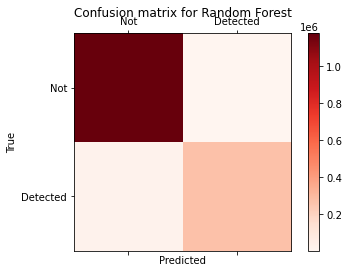

In [54]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(test_y,best_RF_model.predict(test_x)))
#     ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
#     ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))

]

draw_confusion_matrices(confusion_matrices)

In [55]:
confusion_matrix(test_y,best_RF_model.predict(test_x))

array([[1178363,     226],
       [  20220,  270721]], dtype=int64)

## Part 3.4: Model Evaluation - ROC & AUC

ROC curves are used on the one hand to visualize the relation between detection rate and false positive rate of a  classifier while tuning it, and on the other hand to compare the accuracy of several classifiers.

## Part 3.4.1: ROC of baseline Model: RF 

In [56]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_rf)

In [57]:
best_RF_model.predict_proba(test_x)

array([[1.        , 0.        ],
       [0.93333333, 0.06666667],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.93333333, 0.06666667],
       [0.93333333, 0.06666667]])

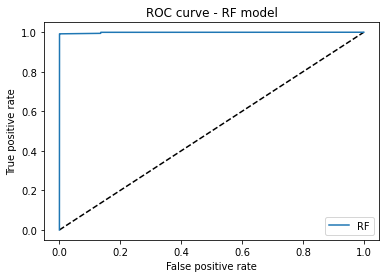

In [58]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [59]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9989012726003186

# Part 4: Feature Importance Discussion- Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

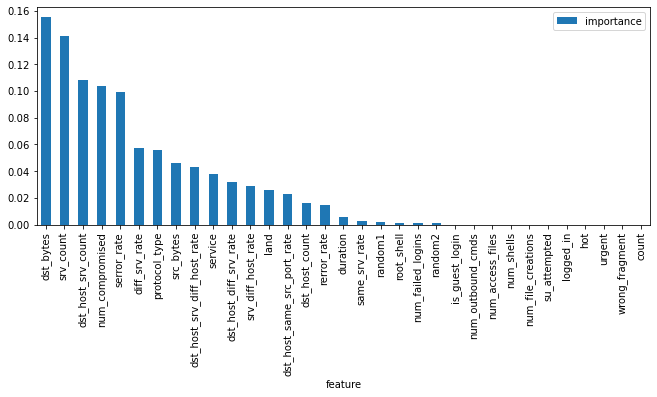

In [62]:
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

# Part 5: Report

Summary:

In this project, I developed an Intrusion Detection System(IDS) to identify normal interactions and various types of attacks. Conduct exploratory data analysis like turn the target variable to feature with binary values by encoding the 22 kinds of attacks into one group called  "abnormal" and removed highly correlated features and missing values, etc.

Futhermore, I built a Random Forest model and fine-tune the model parameters through the grid search to find optimal hyperparameter. 
Several metrics have been designed to measure the effectiveness of IDS. I choose the ranking metrics to include confusion matrix, and Area under the ROC curve (AUC). Those are good metrics that represent the ability of the system to distinguish between intrusive and non-intrusive activities. The evaluation results are too good to be true. A overfitting problem occures because of the imbalanced dataset.

Last but not least, I analyzied top factors that give rise to malicious attacks to gain access or cause destruction to the network."dst_bytes" is the top1 factor to monitor a network or systems for malicious activity or policy violations.

Drawbacks:

1. It is not enough to deal with the imbalanced data just using cross-validation. I can use the SMOTE method for addressing imbalanced datasets and oversample the minority class.
2. Not only measure the effectiveness, but the efficiency should also be considered as a metric to the given model for this measure deals with the resources needed to be allocated to the system including CPU cycles and main memory.
3. More models could be tried to achieve better accuracy when distinguishing between the various types of attacks and normal interactions.